In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("filename.csv")
print(data.head())

Saving filename.csv to filename.csv
                    id      conversation_id               created_at  \
0  1606090662553587712  1578601336593338369  2022-12-23 00:53:48 UTC   
1  1606090660150247424  1605736507784019969  2022-12-23 00:53:47 UTC   
2  1606090657998589952  1605254221649088512  2022-12-23 00:53:47 UTC   
3  1606090657990320128  1606090657990320128  2022-12-23 00:53:47 UTC   
4  1606090653825662978  1606090653825662978  2022-12-23 00:53:46 UTC   

         date      time  timezone              user_id      username  \
0  2022-12-23  00:53:48         0  1599722225162141697    anestezios   
1  2022-12-23  00:53:47         0  1601057647867805697  masterredrum   
2  2022-12-23  00:53:47         0  1494877111600963585     agris1144   
3  2022-12-23  00:53:47         0             52948986     corvid317   
4  2022-12-23  00:53:46         0            108117349   seattle_zim   

                      name place  ... geo source user_rt_id user_rt  \
0    Anestezios Pavlakidis 

In [2]:
data = data[["username", "tweet", "language"]]
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [3]:
data["language"].value_counts()

en     9235
pt      250
qme     191
it      109
in       56
und      48
ru       19
es       17
ja       10
ca        9
fi        8
de        7
et        5
nl        5
hi        5
cy        5
qht       5
ar        5
ro        4
zh        3
th        3
pl        3
no        3
fr        3
tl        2
uk        2
cs        2
fa        1
da        1
vi        1
sl        1
lt        1
Name: language, dtype: int64

In [4]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


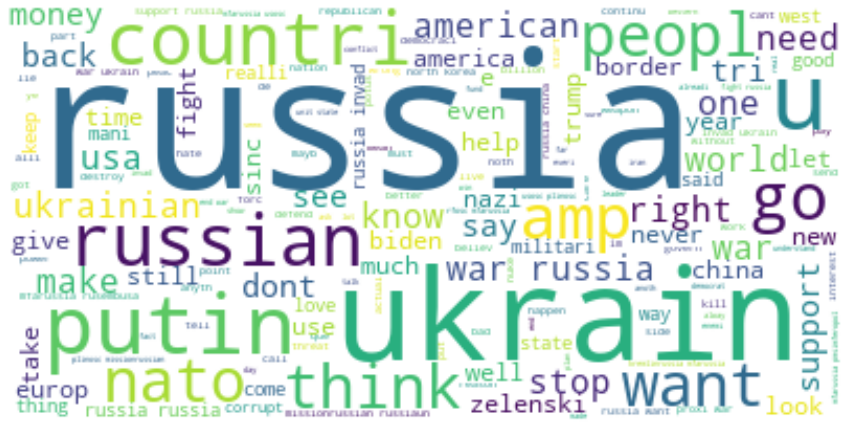

In [5]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               tweet  Positive  Negative  \
0   side thing russia far ahead nuclear arm race ...     0.051     0.158   
1  hodgetwin ukrain burn time prepar noth get rea...     0.073     0.000   
2   speakingsatan nato didnt anyth russia russia ...     0.000     0.340   
3  mossad chief iran could soon widen broaden wea...     0.000     0.196   
4  fbi fisa russia russia russia attempt impeach ...     0.152     0.000   

   Neutral  
0    0.791  
1    0.927  
2    0.660  
3    0.804  
4    0.848  


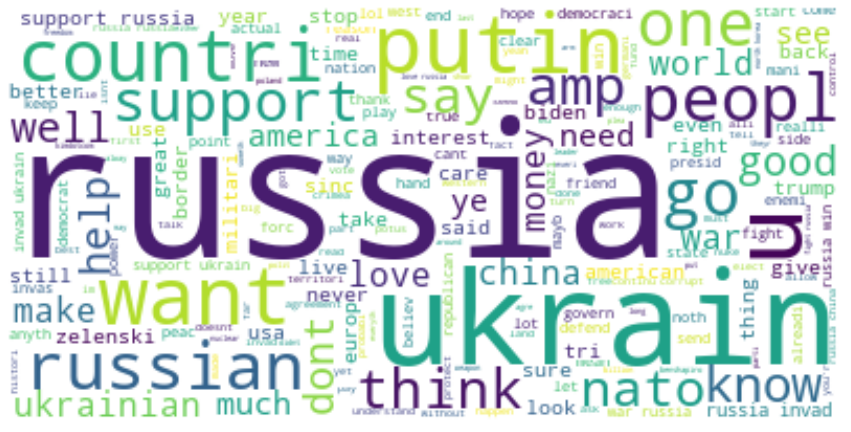

In [7]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

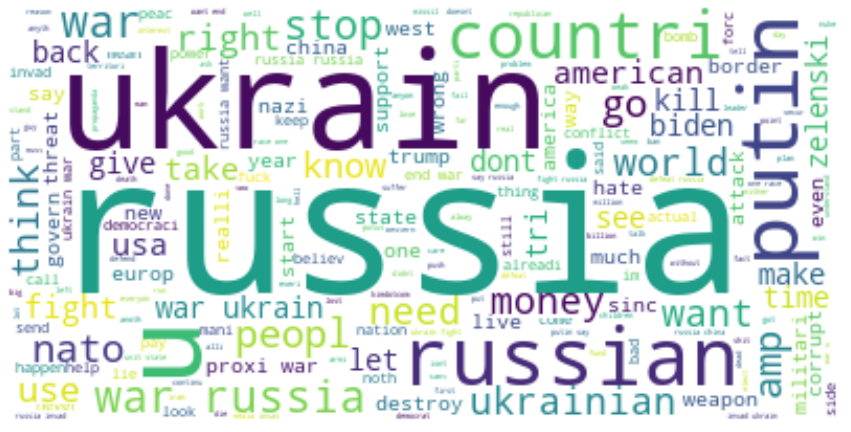

In [8]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()